In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 가져오기

In [3]:
!unzip -o /content/drive/MyDrive/titanic.zip

Archive:  /content/drive/MyDrive/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 결측치 처리

In [4]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
train_df = train_df.drop(['Cabin'], axis=1)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
test_df = pd.read_csv('/content/test.csv')
test_df = test_df.drop(['Cabin'], axis=1)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 데이터 전처리

PassengerId : 승객 id

Survived : 살았는지 죽었는지 여부 (0 or 1)

Pclass : 좌석 등급 ( 1, 2, 3 ) # 1이 제일 좋은 좌석

Name : 승객 이름

Sex : 승객 성별

Age : 승객 나이

Sibsp : 승객과 함께 탄 (형제+자매+배우자) 수

Parch : 승객과 함께 탄 (부모 + 자녀) 수

Ticket : 티켓 번호

Fare : 탑승료

Embarked : 탑승 장소 ( C = Cherbourg, Q = Queenstown, S = Southampton )

필요 없는 피쳐 : PassengerId, Ticket, Name

수치형 데이터 : Age, Sibsp, Parch

범주형 데이터 : Pclass,

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
features = ["Pclass", "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_df[features])
y = train_df['Survived']

X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


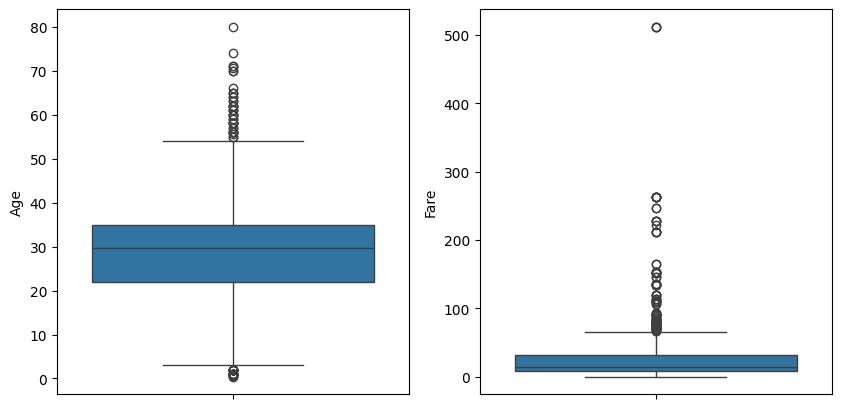

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(X['Age'])

plt.subplot(1, 2, 2)
sns.boxplot(X['Fare'])

plt.show()

# 모델 평가 지표

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


def model_eval(y_pred, y_true):
    cm = confusion_matrix(y_true, y_pred)
    acc, prec, rec, f1 = accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    return acc, prec, rec, f1



# 모델 학습

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [11]:
models = ['DT', 'RF', 'AdaBoost', 'GBM', 'XGB', 'LGBM']
accs = []
f1s = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

Accuracy: 0.7989
Precision: 0.8276
Recall: 0.6486
F1-score: 0.7273


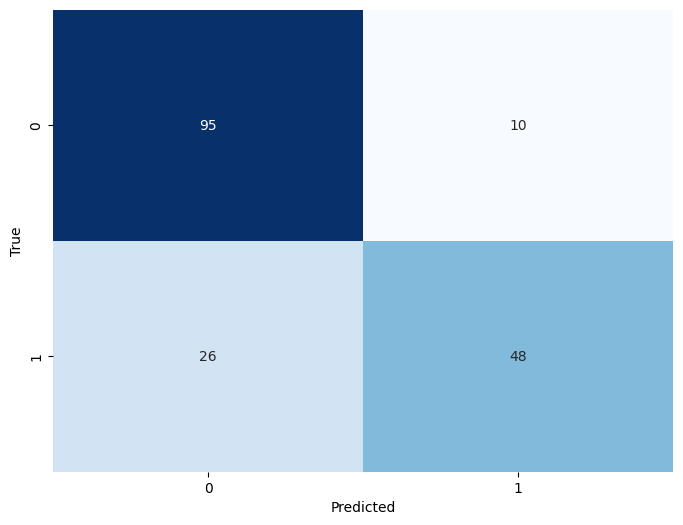

In [12]:
model = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=5, min_samples_split=5 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc, prec, rec, f1 = model_eval(y_pred, y_test)

accs.append(acc)
f1s.append(f1)
precisions.append(prec)
recalls.append(rec)

## Random Forest

Accuracy: 0.8045
Precision: 0.8000
Recall: 0.7027
F1-score: 0.7482


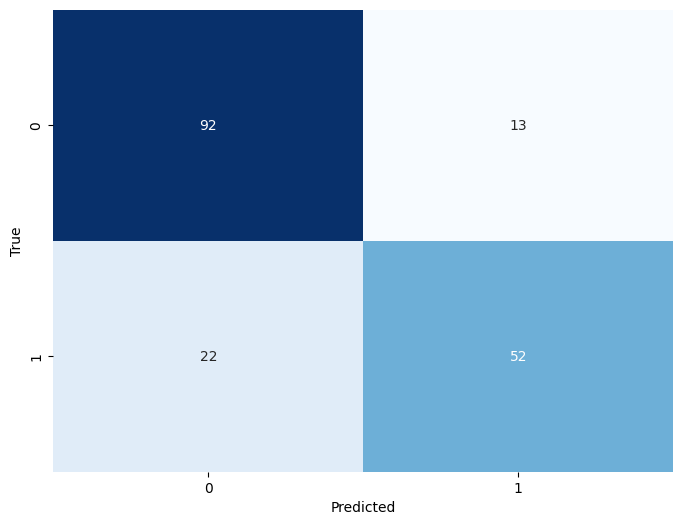

In [13]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc, prec, rec, f1 = model_eval(y_pred, y_test)

accs.append(acc)
f1s.append(f1)
precisions.append(prec)
recalls.append(rec)

## AdaBoost

Accuracy: 0.7989
Precision: 0.7879
Recall: 0.7027
F1-score: 0.7429


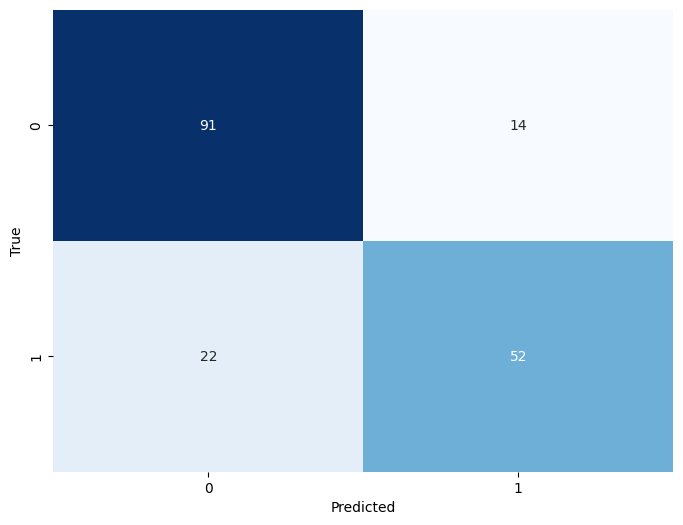

In [14]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc, prec, rec, f1 = model_eval(y_pred, y_test)

accs.append(acc)
f1s.append(f1)
precisions.append(prec)
recalls.append(rec)

## GBM

Accuracy: 0.8156
Precision: 0.8254
Recall: 0.7027
F1-score: 0.7591


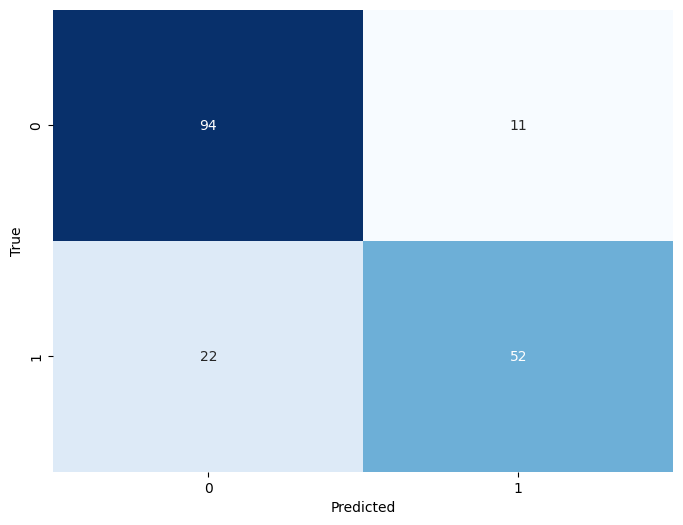

In [15]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc, prec, rec, f1 = model_eval(y_pred, y_test)

accs.append(acc)
f1s.append(f1)
precisions.append(prec)
recalls.append(rec)

## XGBoost

Accuracy: 0.8324
Precision: 0.8143
Recall: 0.7703
F1-score: 0.7917


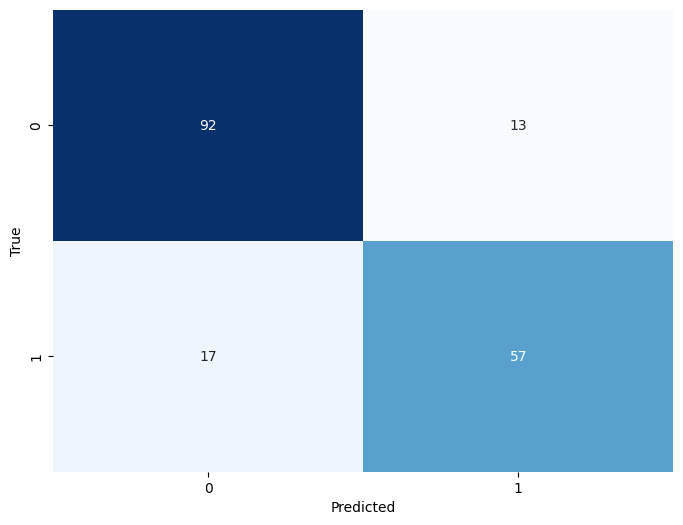

In [16]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc, prec, rec, f1 = model_eval(y_pred, y_test)

accs.append(acc)
f1s.append(f1)
precisions.append(prec)
recalls.append(rec)

## LightGBM

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

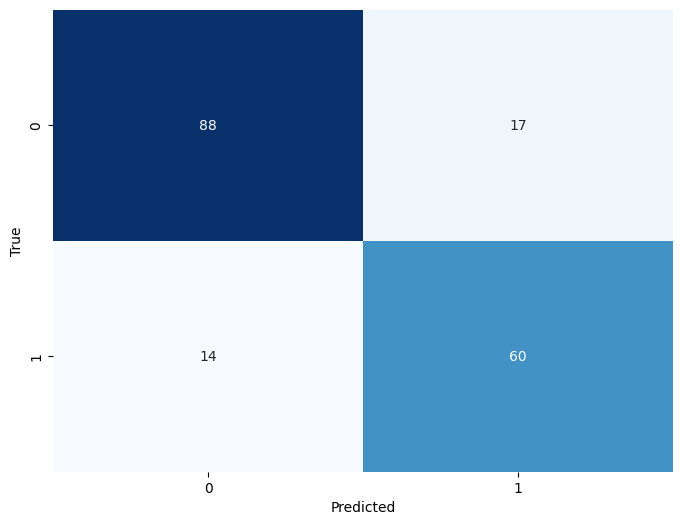

In [17]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc, prec, rec, f1 = model_eval(y_pred, y_test)

accs.append(acc)
f1s.append(f1)
precisions.append(prec)
recalls.append(rec)

# 모델 성능 비교

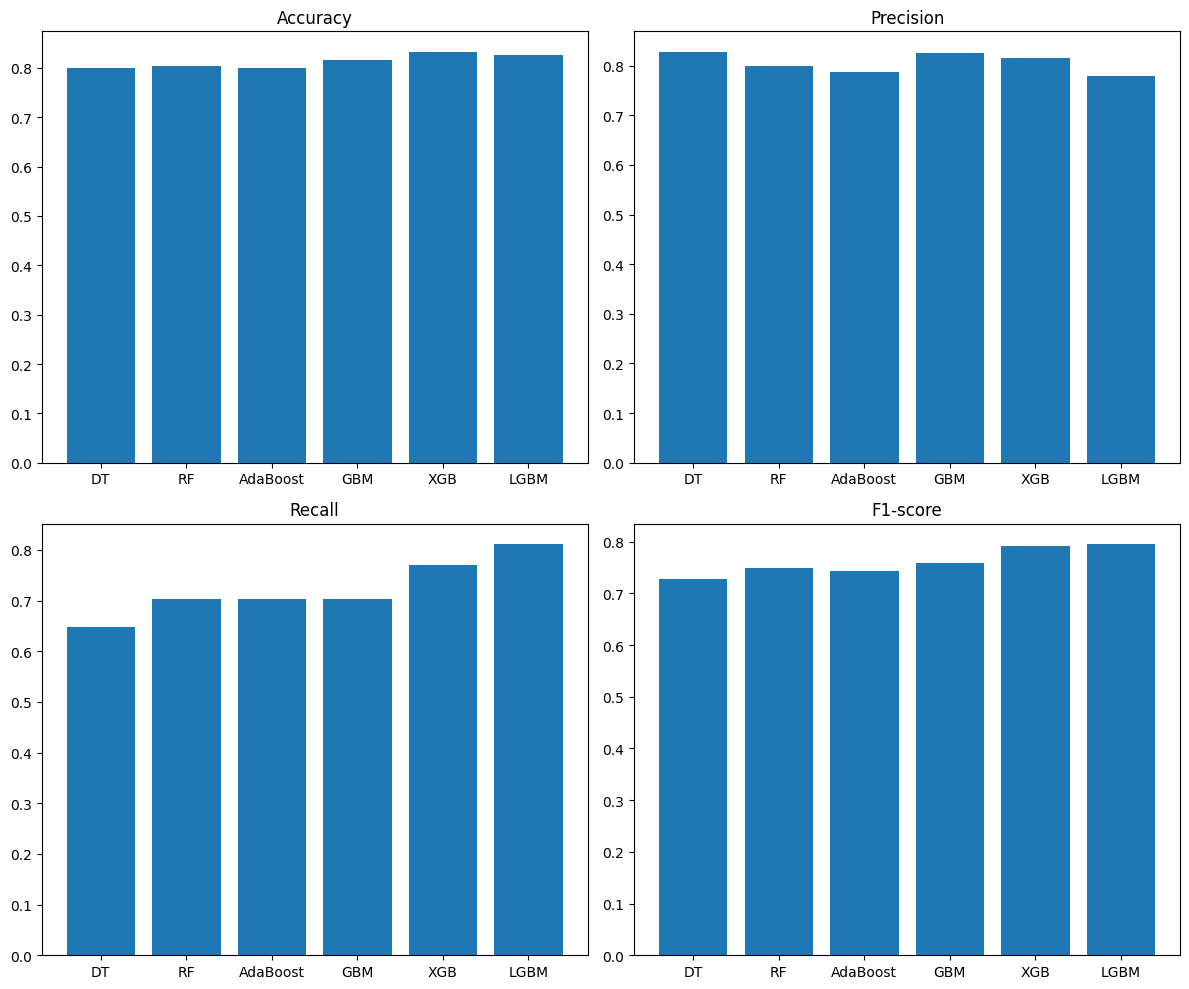

In [18]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.bar(models, accs)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precisions)
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recalls)
plt.title('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1s)
plt.title('F1-score')

plt.tight_layout()
plt.show()